In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import arange, array

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, SelectFromModel
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.compose import ColumnTransformer, make_column_selector

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import ElasticNet, Lasso, Ridge, LinearRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, PredictionErrorDisplay

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [2]:
housing = pd.read_csv('data/size_trimmed.csv')
housing.shape 
# 2523 x 86

(2523, 86)

In [4]:
housing.head()

,GrLivArea,MSSubClass,LotFrontage,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,GarageSize,Remodel_binary,LotPercent,Neighborhood_Num,Remodel_Qual,Remodel_GrLiv,Remodel_Bath,Remodel_Kitch,SalePrice,Log_SalePrice
0,856,1S_1945older,58.800593,6,6,1939,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,1939.0,399.0,0,0,0,0,166,0,0,3,2010,RL,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,SWISU,Norm,Norm,1Fam,1Story,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,Gd,Detchd,Unf,TA,TA,Y,None,None,None,WD,Normal,large,1,0.108492,17,6,856,1,TA,126000,11.744037
1,1049,1S_PUD,42.000000,5,5,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,266.0,0,105,0,0,0,0,0,2,2009,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,BrkFace,Gd,TA,CBlock,Gd,TA,Mn,GLQ,ALQ,GasA,TA,Y,SBrkr,Gd,Typ,None,Attchd,Fin,TA,TA,Y,None,None,None,WD,Normal,small,0,0.247698,7,0,0,0,NaN,139500,11.845820
2,1001,1S_1945older,60.000000,5,9,1930,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.0,216.0,154,0,42,86,0,0,0,11,2007,C (all),Pave,None,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,Gd,TA,BrkTil,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Detchd,Unf,TA,Po,N,None,None,None,WD,Normal,small,1,0.165182,5,5,1001,1,Gd,124900,11.735269
3,1039,2S_1945older,80.000000,4,8,1900,0.0,0.0,0.0,405.0,405.0,717,322,0,0.0,0.0,1,0,2,1,6,0,1940.0,281.0,0,0,168,0,111,0,0,5,2009,RL,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,Gable,CompShg,MetalSd,MetalSd,None,Gd,Gd,BrkTil,Fa,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,None,Detchd,Unf,TA,TA,N,None,None,None,WD,Normal,small,1,0.088019,12,4,1039,1,TA,114000,11.643954
4,1665,2S_1946newer,70.000000,8,6,2001,0.0,643.0,0.0,167.0,810.0,810,855,0,1.0,0.0,2,1,3,1,6,0,2001.0,528.0,0,45,0,0,0,0,0,11,2009,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,Fin,TA,TA,Y,None,None,None,WD,Normal,large,0,0.096429,23,0,0,0,NaN,227000,12.332705


## Ridge Regression

In [3]:
# define pipeline
col_transform = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), make_column_selector(dtype_include=np.number)),
        ("cat", OneHotEncoder(sparse_output = False, handle_unknown = 'ignore'), 
                 make_column_selector(dtype_include=object))], 
        verbose_feature_names_out = False
)

ridge_pipe = Pipeline(
    steps=[
        ("cols", col_transform), 
        ("regression", Ridge(alpha = 11))]
)

In [4]:
X = housing.drop(['SalePrice', 'Log_SalePrice'], axis=1)
y = housing['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
ridge = ridge_pipe
ridge.fit(X_train, y_train)

print('train R^2: {}'.format(ridge.score(X_train, y_train)))
print('test R^2: {}'.format(ridge.score(X_test, y_test)))

train R^2: 0.9394786138202964
test R^2: 0.9333538069544433


In [6]:
y_true = y_test
y_pred = ridge.predict(X_test)
mean_squared_error(y_true, y_pred)

302506053.6418642

In [7]:
ridge_mod = ridge_pipe.named_steps['regression']
ridge_mod

Ridge(alpha=11)

In [ ]:
# plot residuals for test set only
y_true = y_test
y_pred = ridge.predict(X_test)
mean_squared_error(y_true, y_pred)

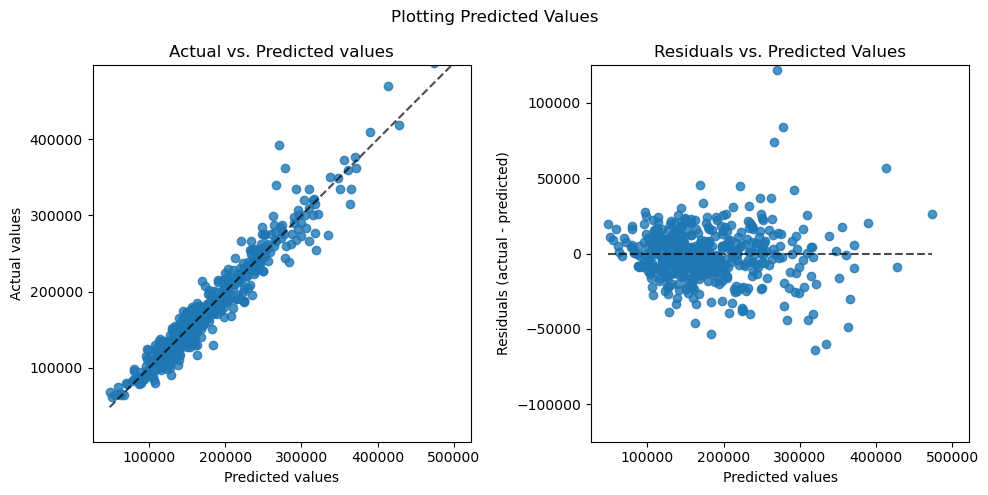

In [103]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5), sharex = True)

PredictionErrorDisplay.from_predictions(
    y_true,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
#axs[0].set_xlim(0, 500000)
axs[0].set_xticks(arange(100000, 600000,100000))
axs[0].set_ylim(0, 500000)
axs[0].set_yticks(arange(100000, 500000,100000))

PredictionErrorDisplay.from_predictions(
    y_true,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
axs[1].set_ylim(-125000, 125000)

fig.suptitle("Plotting Predicted Values")
plt.tight_layout()
plt.show()

In [8]:
# plot residuals for all data
y_true = y
y_pred = ridge.predict(X)
mean_squared_error(y_true, y_pred)

289665848.879075

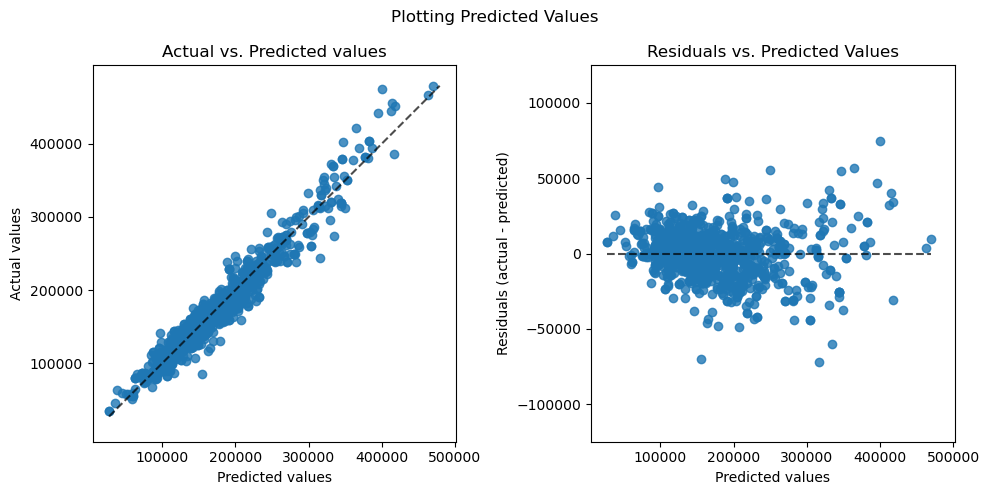

In [113]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5), sharex = True)

PredictionErrorDisplay.from_predictions(
    y_true,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
axs[0].set_xticks(arange(100000, 600000,100000))
axs[0].set_ylim(0, 500000)
axs[0].set_yticks(arange(100000, 500000,100000))

PredictionErrorDisplay.from_predictions(
    y_true,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
axs[1].set_ylim(-125000, 125000)

fig.suptitle("Plotting Predicted Values")
plt.tight_layout()
plt.show()

In [ ]:
# while test set has more outliers with high positive residuals
# overall dataset has more outlier with high negative residuals

# residuals = actual - predicted
# when residual is negative, predicted is greater than actual
# these homes were undervalued in sale price, according to the model

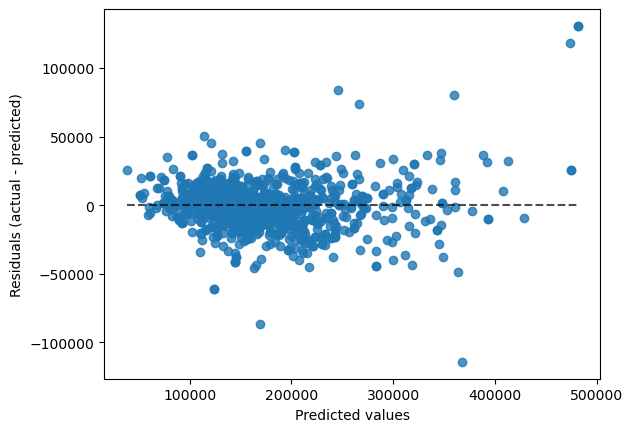

In [119]:
disp = PredictionErrorDisplay.from_predictions(y_true=y_true, y_pred=y_pred)
plt.show()

In [9]:
resid = pd.DataFrame((y_true - y_pred), index = X.index)
resid.columns = ['res']
resid

,res
0,7270.765933
1,7307.430358
2,-8079.575237
3,14642.851111
4,11377.749456
...,...
2518,2201.682229
2519,3883.714967
2520,-17434.555392
2521,-5099.247227


In [66]:
resid.mean()

res   -117.236156
dtype: float64

array([[<Axes: title={'center': 'SalePrice'}>]], dtype=object)

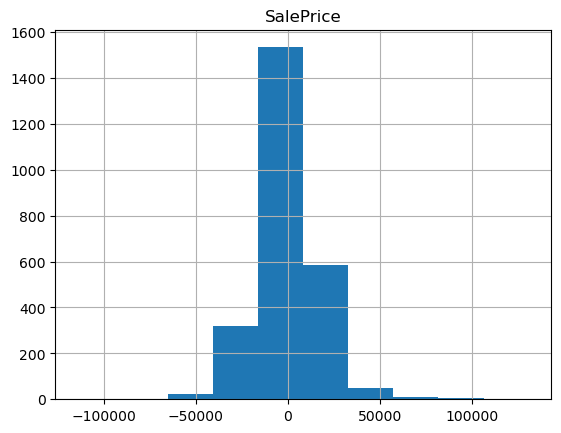

In [125]:
resid.hist()

In [140]:
# identify points with above/below 50,000 in residual
resid[resid['res'] < -50000].shape # 9 homes
resid[resid['res'] > 50000].shape #24 homes

(24, 1)

In [157]:
abs_error = abs(resid)
abs_error.sort_values('res', ascending = False)
# highest prediction error is over 130k

,res
570,130703.268657
602,122078.777057
600,118367.318458
500,114172.552638
64,103853.340142
...,...
586,36.409685
998,35.706307
1497,25.636877
1057,10.415848


In [160]:
resid.sort_values('res', ascending = True).head(10)
# top 10 undervalued homes have predicted sale price at least 50k above actual sale price

,res
500,-114172.552638
178,-86773.136000
1993,-71930.647549
973,-70144.942471
2238,-64399.196337
1692,-63789.685815
1494,-61187.494180
1873,-60192.763885
1962,-53327.077833
657,-48816.816674


In [26]:
under_50k_idx = resid.sort_values('res', ascending = True).head(9).index
under_50k_idx

Int64Index([500, 178, 1993, 973, 2238, 1692, 1494, 1873, 1962], dtype='int64')

In [27]:
housing['y_pred'] = ridge.predict(X)
housing['resid'] = resid['res']
housing_under_50k = housing[housing.index.isin(under_50k_idx)]
housing_under_50k

,GrLivArea,MSSubClass,LotFrontage,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,GarageSize,Remodel_binary,LotPercent,Neighborhood_Num,Remodel_Qual,Remodel_GrLiv,Remodel_Bath,Remodel_Kitch,SalePrice,Log_SalePrice,y_pred,resid
178,1411,1S_1946newer,85.000000,7,5,1977,209.0,822.0,0.0,564.0,1386.0,1411,0,0,0.0,0.0,2,0,3,1,6,1,1977.0,544.0,192,0,0,0,0,0,0,4,2009,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Plywood,Plywood,BrkFace,TA,Gd,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,None,None,None,WD,Family,large,0,0.118571,23,0,0,0,NaN,82500,11.320554,169273.136000,-86773.136000
500,2042,1S_1946newer,98.000000,8,5,2008,306.0,0.0,0.0,2042.0,2042.0,2042,0,0,0.0,0.0,2,1,3,1,8,1,2009.0,1390.0,0,90,0,0,0,0,0,8,2009,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,Hip,CompShg,VinylSd,VinylSd,BrkFace,Ex,TA,PConc,Ex,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,Gd,Attchd,RFn,TA,TA,Y,None,None,None,New,Partial,large,1,0.160737,27,8,2042,2,Ex,253293,12.442302,367465.552638,-114172.552638
973,1728,duplex,98.000000,5,6,1962,144.0,1500.0,0.0,228.0,1728.0,1728,0,0,2.0,0.0,2,0,6,2,10,0,1962.0,0.0,0,0,0,0,0,0,0,1,2010,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,Hip,CompShg,HdBoard,HdBoard,BrkFace,TA,TA,CBlock,TA,TA,No,BLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,None,None,None,None,None,Y,None,None,None,Oth,Abnorml,small,1,0.130317,6,5,1728,2,TA,84900,11.349229,155044.942471,-70144.942471
1494,864,1S_1946newer,60.000000,5,5,1965,0.0,553.0,311.0,0.0,864.0,864,0,0,0.0,0.0,1,0,3,1,5,1,1965.0,360.0,0,0,236,0,0,0,0,12,2009,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,No,Rec,BLQ,GasA,Gd,Y,SBrkr,TA,Typ,Po,Detchd,Unf,TA,TA,Y,None,GdWo,None,WD,Normal,small,0,0.104335,1,0,0,0,NaN,62383,11.041048,123570.494180,-61187.494180
1692,2207,1S_1946newer,148.305678,7,5,1970,287.0,912.0,0.0,1035.0,1947.0,2207,0,0,1.0,0.0,2,0,3,1,7,1,1970.0,576.0,301,0,0,0,0,0,0,7,2010,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,PosA,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,BrkFace,TA,TA,CBlock,Gd,TA,Gd,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Min1,Gd,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal,large,1,0.110905,6,7,2207,2,TA,180000,12.100712,243789.685815,-63789.685815
1873,1518,1S_PUD,62.000000,8,5,2003,472.0,1218.0,0.0,300.0,1518.0,1518,0,0,0.0,0.0,1,1,1,1,6,1,2003.0,588.0,185,140,0,0,0,0,0,4,2008,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,TwnhsE,1Story,Hip,CompShg,MetalSd,MetalSd,BrkFace,Ex,TA,PConc,Ex,TA,Gd,GLQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,Gd,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal,large,1,0.119744,27,8,1518,1,Ex,274000,12.520883,334192.763885,-60192.763885
1962,2034,1S_1946newer,200.000000,3,5,1953,0.0,0.0,0.0,0.0,0.0,2034,0,0,0.0,0.0,1,0,2,1,9,0,1953.0,1041.0,483,266,0,0,0,561,0,6,2007,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,None,None,None,None,None,GasA,Ex,Y,SBrkr,TA,Min1,None,2Types,RFn,TA,TA,N,TA,GdPrv,None,WD,Normal,large,0,0.046759,9,0,0,0,NaN,130000,11.775290,183327.077833,-53327.077833
1993,2223,1S_1946newer,95.000000,7,6,1973,1115.0,1880.0,0.0,343.0,2223.0,2223,0,0,1.0,0.0,2,0,3,1,8,2,1973.0,516.0,300,0,0,0,0,0,0,2

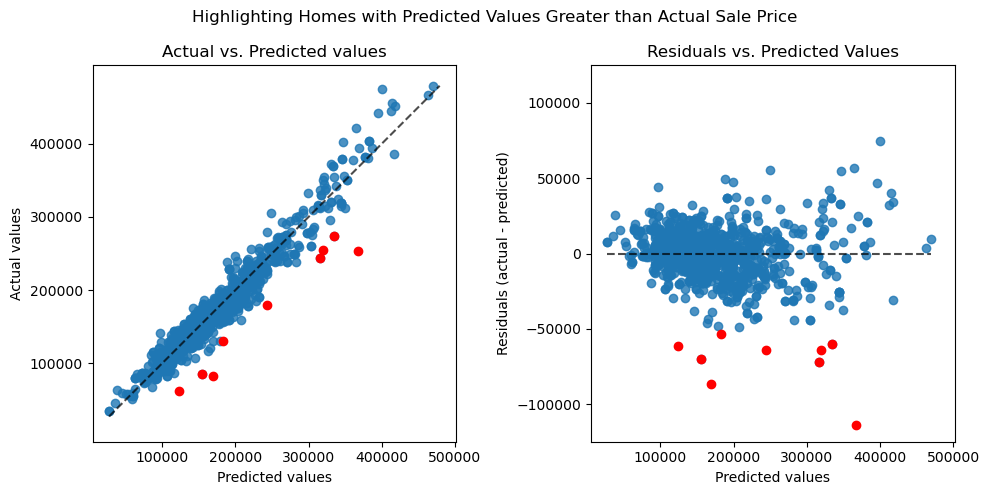

In [32]:
# highlight homes undervalued by 50k or more

fig, axs = plt.subplots(ncols=2, figsize=(10, 5), sharex = True)

PredictionErrorDisplay.from_predictions(
    y_true,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
axs[0].set_xticks(arange(100000, 600000,100000))
axs[0].set_ylim(0, 500000)
axs[0].set_yticks(arange(100000, 500000,100000))
axs[0].scatter(housing_under_50k['y_pred'], housing_under_50k['SalePrice'], c = 'r')

PredictionErrorDisplay.from_predictions(
    y_true,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
axs[1].set_ylim(-125000, 125000)
axs[1].scatter(housing_under_50k['y_pred'], housing_under_50k['resid'], c = 'r')

fig.suptitle("Highlighting Homes with Predicted Values Greater than Actual Sale Price")
plt.tight_layout()
plt.show()

In [55]:
# examine homes where predicted value is above actual sale price
homes_underval = housing[housing['resid'] < 0]
homes_overval = housing[housing['resid'] > 0]

In [34]:
homes_underval.shape
# about half of the observations

(1270, 88)

In [169]:
homes_underval.describe()

,GrLivArea,LotFrontage,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Remodel_binary,LotPercent,Neighborhood_Num,Remodel_Qual,Remodel_GrLiv,Remodel_Bath,SalePrice,Log_SalePrice,y_pred,resid
count,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000
mean,1463.113386,70.979577,6.070866,5.622835,1970.146457,101.507087,460.362205,55.674803,529.248031,1045.285039,1146.614961,313.517323,2.981102,0.445669,0.059055,1.537008,0.366142,2.800787,1.039370,6.332283,0.611811,1975.070866,458.594364,91.584252,45.308661,23.258268,2.150394,18.600787,1.361417,58.155118,6.137008,2007.791339,0.474016,0.139589,13.803150,2.802362,704.912598,0.709449,165593.884252,11.959816,177680.856113,-12086.971861
std,413.937869,30.861476,1.242034,1.138321,29.716082,174.104661,420.692676,179.343063,422.869783,399.519896,351.470549,399.228785,31.666624,0.511300,0.242412,0.521984,0.498021,0.800216,0.202489,1.441744,0.658115,26.111714,203.569397,126.905040,65.556086,61.313269,20.741538,59.898447,29.278036,640.290583,2.711235,1.292430,0.499521,0.070121,7.714303,3.077332,800.530952,0.834532,56645.924683,0.346003,58847.139481,11067.067165
min,334.000000,12.669329,1.000000,1.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.020317,1.000000,0.000000,0.000000,0.000000,12789.000000,9.456341,40659.280163,-114172.552638
25%,1143.250000,56.048050,5.000000,5.000000,1953.000000,0.000000,0.000000,0.000000,200.000000,802.250000,886.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,322.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,0.000000,0.096912,6.000000,0.000000,0.000000,0.000000,128050.000000,11.760176,137755.400520,-17180.090763
50%,1440.500000,68.000000,6.000000,5.000000,1972.000000,0.000000,426.000000,0.000000,440.000000,994.000000,1085.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,478.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,0.000000,0.121310,12.500000,0.000000,0.000000,0.000000,157000.000000,11.964001,167014.590630,-9216.554094
75%,1710.000000,80.086157,7.000000,6.000000,1999.000000,165.500000,775.750000,0.000000,776.000000,1280.750000,1370.000000,675.750000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,1999.000000,572.750000,164.750000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,1.000000,0.158306,20.000000,6.000000,1445.500000,1.000000,192000.000000,12.165251,207367.872648,-4123.728730
max,2654.000000,426.285668,10.000000,9.000000,2008.000000,1600.000000,1880.000000,1526.000000,2336.000000,3206.000000,2524.000000,1611.000000,514.000000,2.000000,2.000000,4.000000,2.000000,6.000000,3.000000,12.000000,4.000000,2009.000000,1488.000000,1424.000000,742.000000,584.000000,320.000000,576.000000,800.000000,15500.000000,12.000000,2010.000000,1.000000,0.517647,28.000000,10.000000,2654.000000,4.000000,419005.000000,12.945638,428082.190862,-7.222279


In [167]:
housing.describe()

,GrLivArea,LotFrontage,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Remodel_binary,LotPercent,Neighborhood_Num,Remodel_Qual,Remodel_GrLiv,Remodel_Bath,SalePrice,Log_SalePrice,y_pred,resid
count,2523.000000,2523.000000,2523.000000,2523.000000,2523.000000,2523.000000,2523.000000,2523.000000,2523.000000,2523.000000,2523.000000,2523.000000,2523.000000,2523.000000,2523.000000,2523.000000,2523.000000,2523.000000,2523.000000,2523.000000,2523.000000,2523.000000,2523.000000,2523.000000,2523.000000,2523.000000,2523.000000,2523.000000,2523.000000,2523.000000,2523.000000,2523.000000,2523.000000,2523.000000,2523.000000,2523.000000,2523.000000,2523.000000,2523.000000,2523.000000,2523.000000,2523.000000
mean,1452.151407,72.143899,6.001982,5.617519,1970.058660,92.941736,437.759413,52.468886,534.977804,1025.206104,1130.567578,317.817281,3.766548,0.430440,0.061831,1.531906,0.364645,2.825208,1.040032,6.315101,0.585018,1974.992073,460.674928,93.032501,44.686881,23.317083,2.567975,15.550931,1.403488,48.583829,6.135157,2007.840270,0.459770,0.137896,13.540626,2.686881,678.681728,0.684503,173974.583432,11.997017,174091.819589,-117.236156
std,433.961964,46.369361,1.336813,1.115088,29.637121,164.962030,423.455643,170.316467,421.993023,407.847898,359.179171,403.318980,41.680678,0.515633,0.244166,0.529907,0.492822,0.804901,0.202048,1.461167,0.636117,26.060031,203.608723,126.172181,63.547408,64.215260,25.575324,54.711493,28.543324,502.300500,2.673401,1.313721,0.498478,0.074579,7.663072,3.060106,798.184624,0.828914,68538.542616,0.372776,66170.954428,17022.542546
min,334.000000,11.424754,1.000000,1.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.009082,1.000000,0.000000,0.000000,0.000000,12789.000000,9.456341,26945.358993,-114172.552638
25%,1102.500000,58.000000,5.000000,5.000000,1953.000000,0.000000,0.000000,0.000000,212.000000,784.000000,866.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,312.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,0.000000,0.093899,6.000000,0.000000,0.000000,0.000000,129450.000000,11.771050,128737.604300,-9295.379006
50%,1426.000000,69.000000,6.000000,5.000000,1971.000000,0.000000,380.000000,0.000000,447.000000,972.000000,1058.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,471.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,0.000000,0.119012,12.000000,0.000000,0.000000,0.000000,158000.000000,11.970350,159907.055083,-128.556817
75%,1716.500000,80.159592,7.000000,6.000000,1999.000000,146.000000,725.500000,0.000000,780.000000,1248.000000,1340.500000,684.000000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,1999.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,1.000000,0.154815,19.500000,6.000000,1405.000000,1.000000,204375.000000,12.227710,207903.919576,8542.452964
max,2654.000000,1227.136330,10.000000,9.000000,2010.000000,1600.000000,2257.000000,1526.000000,2336.000000,3206.000000,2633.000000,1788.000000,1064.000000,3.000000,2.000000,4.000000,2.000000,6.000000,3.000000,13.000000,4.000000,2010.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,15500.000000,12.000000,2010.000000,1.000000,0.520548,28.000000,10.000000,2654.000000,4.000000,615000.000000,13.329378,511146.659858,130703.268657


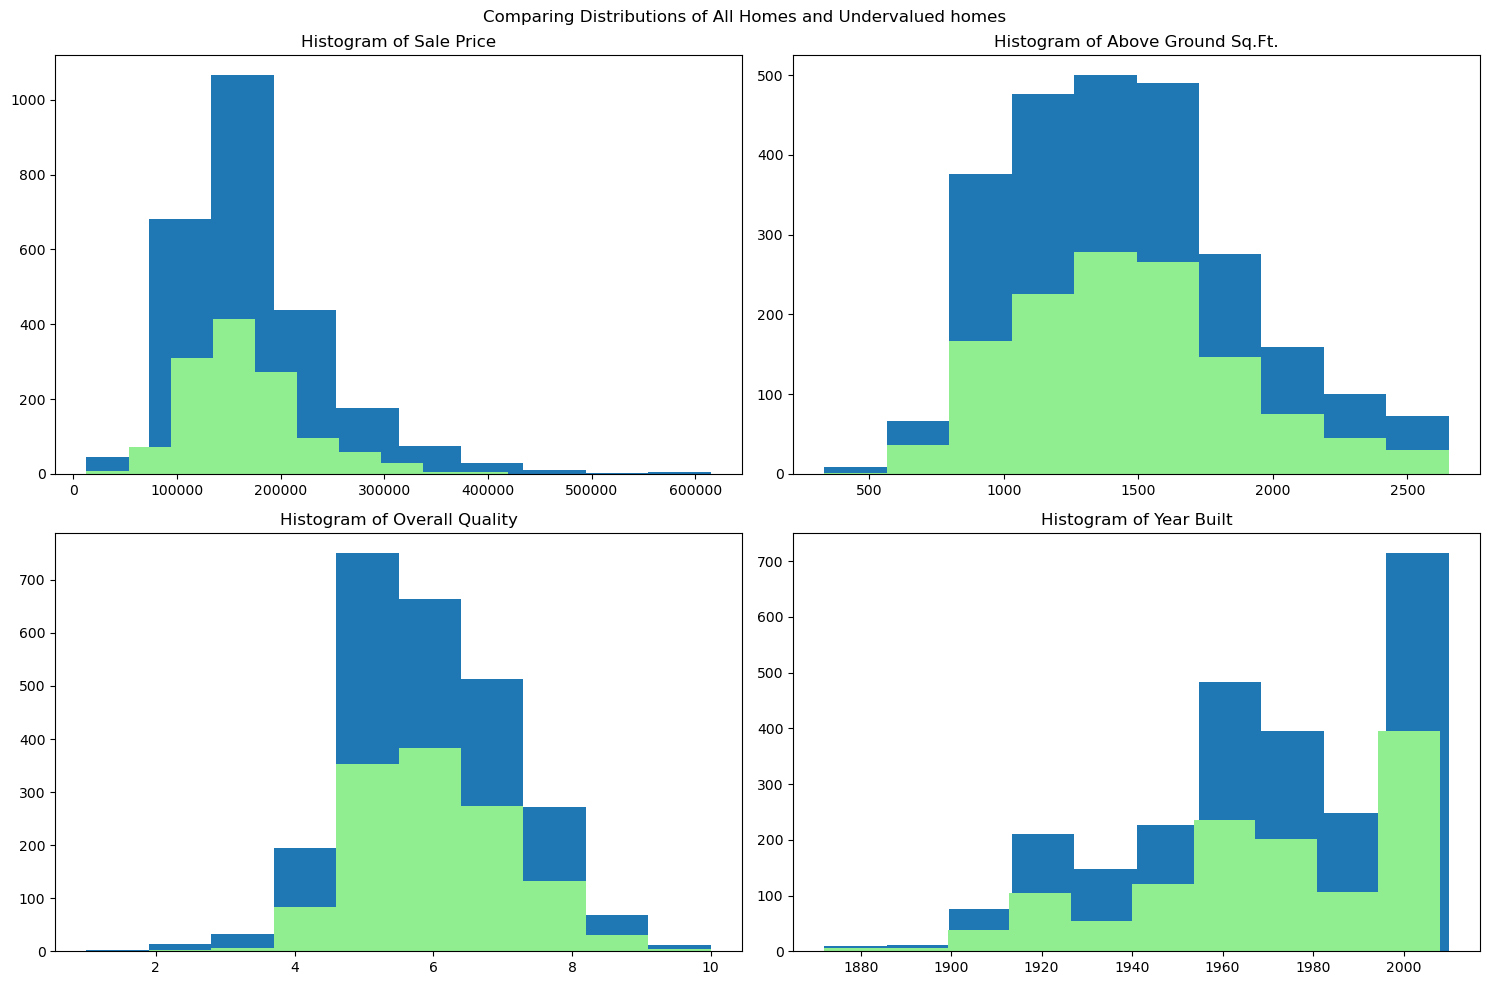

In [68]:
# homes that are undervalued have a similar distribution to homes overall

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15, 10))

axs[0][0].hist(housing['SalePrice'])
axs[0][0].hist(homes_underval['SalePrice'], color = 'lightgreen')
axs[0][0].set_title('Histogram of Sale Price')

axs[0][1].hist(housing['GrLivArea'])
axs[0][1].hist(homes_underval['GrLivArea'], color = 'lightgreen')
axs[0][1].set_title('Histogram of Above Ground Sq.Ft.')

axs[1][1].hist(housing['YearBuilt'])
axs[1][1].hist(homes_underval['YearBuilt'], color = 'lightgreen')
axs[1][1].set_title('Histogram of Year Built')

axs[1][0].hist(housing['OverallQual'])
axs[1][0].hist(homes_underval['OverallQual'], color = 'lightgreen')
axs[1][0].set_title('Histogram of Overall Quality')

fig.suptitle("Comparing Distributions of All Homes and Undervalued homes")
plt.tight_layout()
plt.show()

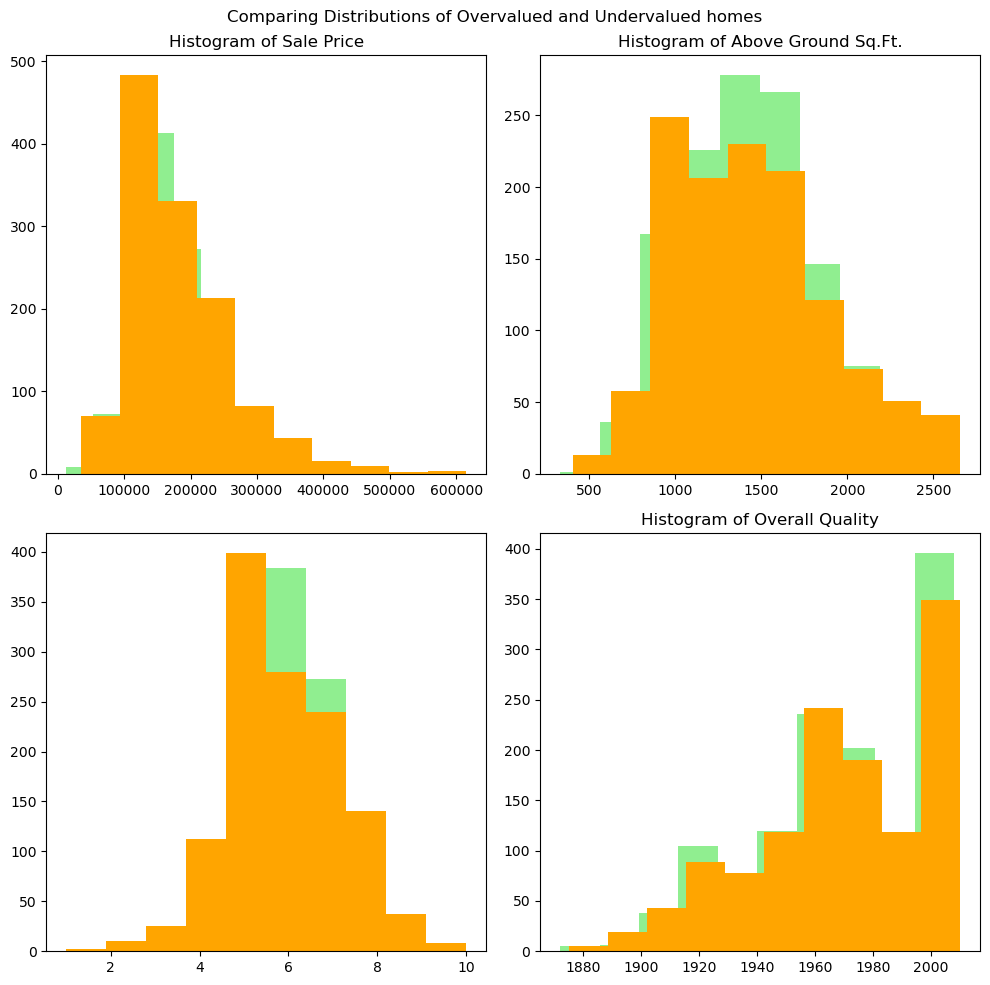

In [60]:
# homes that are undervalued vs homes that are overvalued

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))

axs[0][0].hist(homes_underval['SalePrice'], color = 'lightgreen')
axs[0][0].hist(homes_overval['SalePrice'], color = 'orange')
axs[0][0].set_title('Histogram of Sale Price')

axs[0][1].hist(homes_underval['GrLivArea'], color = 'lightgreen')
axs[0][1].hist(homes_overval['GrLivArea'], color = 'orange')
axs[0][1].set_title('Histogram of Above Ground Sq.Ft.')

axs[1][1].hist(homes_underval['YearBuilt'], color = 'lightgreen')
axs[1][1].hist(homes_overval['YearBuilt'], color = 'orange')
axs[1][1].set_title('Histogram of Year Built')

axs[1][0].hist(homes_underval['OverallQual'], color = 'lightgreen')
axs[1][0].hist(homes_overval['OverallQual'], color = 'orange')
axs[1][1].set_title('Histogram of Overall Quality')

fig.suptitle("Comparing Distributions of Overvalued and Undervalued homes")
plt.tight_layout()
plt.show()

In [171]:
# view undervalued homes with the greatest error
homes_underval.sort_values('resid', ascending = True).head(10)

,GrLivArea,MSSubClass,LotFrontage,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,GarageSize,Remodel_binary,LotPercent,Neighborhood_Num,Remodel_Qual,Remodel_GrLiv,Remodel_Bath,Remodel_Kitch,SalePrice,Log_SalePrice,y_pred,resid
500,2042,1S_1946newer,98.000000,8,5,2008,306.0,0.0,0.0,2042.0,2042.0,2042,0,0,0.0,0.0,2,1,3,1,8,1,2009.0,1390.0,0,90,0,0,0,0,0,8,2009,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,Hip,CompShg,VinylSd,VinylSd,BrkFace,Ex,TA,PConc,Ex,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,Gd,Attchd,RFn,TA,TA,Y,None,None,None,New,Partial,large,1,0.160737,27,8,2042,2,Ex,253293,12.442302,367465.552638,-114172.552638
178,1411,1S_1946newer,85.000000,7,5,1977,209.0,822.0,0.0,564.0,1386.0,1411,0,0,0.0,0.0,2,0,3,1,6,1,1977.0,544.0,192,0,0,0,0,0,0,4,2009,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Plywood,Plywood,BrkFace,TA,Gd,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,None,None,None,WD,Family,large,0,0.118571,23,0,0,0,NaN,82500,11.320554,169273.136000,-86773.136000
1993,2223,1S_1946newer,95.000000,7,6,1973,1115.0,1880.0,0.0,343.0,2223.0,2223,0,0,1.0,0.0,2,0,3,1,8,2,1973.0,516.0,300,0,0,0,0,0,0,2,2007,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,BrkFace,TA,Gd,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Fin,TA,TA,Y,None,None,None,WD,Normal,large,0,0.162845,6,0,0,0,NaN,244000,12.404924,315930.647549,-71930.647549
973,1728,duplex,98.000000,5,6,1962,144.0,1500.0,0.0,228.0,1728.0,1728,0,0,2.0,0.0,2,0,6,2,10,0,1962.0,0.0,0,0,0,0,0,0,0,1,2010,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,Hip,CompShg,HdBoard,HdBoard,BrkFace,TA,TA,CBlock,TA,TA,No,BLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,None,None,None,None,None,Y,None,None,None,Oth,Abnorml,small,1,0.130317,6,5,1728,2,TA,84900,11.349229,155044.942471,-70144.942471
2238,2362,1S_1946newer,80.000000,7,6,1980,600.0,1732.0,0.0,270.0,2002.0,2362,0,0,1.0,0.0,2,1,3,1,8,1,1980.0,546.0,180,16,0,0,0,0,0,3,2007,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Veenker,Norm,Norm,1Fam,1Story,Hip,CompShg,VinylSd,MetalSd,BrkFace,Gd,TA,CBlock,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,Gd,TA,Y,None,None,None,WD,Normal,large,0,0.196833,24,0,0,0,NaN,255000,12.449019,319399.196337,-64399.196337
1692,2207,1S_1946newer,148.305678,7,5,1970,287.0,912.0,0.0,1035.0,1947.0,2207,0,0,1.0,0.0,2,0,3,1,7,1,1970.0,576.0,301,0,0,0,0,0,0,7,2010,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,PosA,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,BrkFace,TA,TA,CBlock,Gd,TA,Gd,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Min1,Gd,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal,large,1,0.110905,6,7,2207,2,TA,180000,12.100712,243789.685815,-63789.685815
1494,864,1S_1946newer,60.000000,5,5,1965,0.0,553.0,311.0,0.0,864.0,864,0,0,0.0,0.0,1,0,3,1,5,1,1965.0,360.0,0,0,236,0,0,0,0,12,2009,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,No,Rec,BLQ,GasA,Gd,Y,SBrkr,TA,Typ,Po,Detchd,Unf,TA,TA,Y,None,GdWo,None,WD,Normal,small,0,0.104335,1,0,0,0,NaN,62383,11.041048,123570.494180,-61187.494180
1873,1518,1S_PUD,62.000000,8,5,2003,472.0,1218.0,0.0,300.0,1518.0,1518,0,0,0.0,0.0,1,1,1,1,6,1,2003.0,588.0,185,140,0,0,0,0,0,4,2008,RL,

In [65]:
# explore top 100 undervalued homes
underval_top = homes_underval.sort_values('error', ascending = True).head(100)
underval_top

,GrLivArea,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,Remodel_binary,GarageSize,TotalIndoorSF,LotPercent,LivArea_sq,Log_LivArea,Neighborhood_Num,Remodel_Qual,Remodel_GrLiv,Remodel_TotSF,Remodel_Bath,SalePrice,Log_SalePrice,y_pred,error
427,832,1S_1945older,68.000000,9656,2,2,1923,1970,0.0,0.0,0.0,678.0,678.0,832,0,0,0.0,0.0,1,0,2,1,5,1,1928.0,2.0,780.0,0,0,0,0,0,0,0,6,2010,RM,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,Gable,CompShg,AsbShng,AsbShng,None,TA,Fa,BrkTil,Fa,Fa,No,Unf,Unf,GasA,TA,N,SBrkr,TA,Typ,Gd,Detchd,Unf,Fa,Fa,N,None,None,None,WD,Abnorml,1,large,1510.0,0.086164,692224,6.723832,12,2,832,1510.0,1,12789,9.456341,10.761646,-1.305305
309,4676,2S_1946newer,130.000000,40094,10,5,2007,2008,762.0,2260.0,0.0,878.0,3138.0,3138,1538,0,1.0,0.0,3,1,3,1,11,1,2007.0,3.0,884.0,208,406,0,0,0,0,0,10,2007,RL,Pave,None,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,Hip,CompShg,CemntBd,CmentBd,Stone,Ex,TA,PConc,Ex,TA,Gd,GLQ,Unf,GasA,Ex,Y,SBrkr,Ex,Typ,Gd,BuiltIn,Fin,TA,TA,Y,None,None,None,New,Partial,1,large,7814.0,0.078266,21864976,8.450198,7,10,4676,7814.0,3,184750,12.126759,13.183023,-1.056265
180,1411,1S_1946newer,85.000000,11900,7,5,1977,1977,209.0,822.0,0.0,564.0,1386.0,1411,0,0,0.0,0.0,2,0,3,1,6,1,1977.0,2.0,544.0,192,0,0,0,0,0,0,4,2009,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Plywood,Plywood,BrkFace,TA,Gd,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,None,None,None,WD,Family,0,large,2797.0,0.118571,1990921,7.252054,23,0,0,0.0,0,82500,11.320554,11.977593,-0.657039
740,1317,2S_1945older,50.000000,8500,4,4,1920,1950,0.0,0.0,0.0,649.0,649.0,649,668,0,0.0,0.0,1,0,3,1,6,0,1920.0,1.0,250.0,0,54,172,0,0,0,0,7,2008,C (all),Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,Gambrel,CompShg,BrkFace,BrkFace,None,TA,Fa,BrkTil,TA,TA,No,Unf,Unf,GasA,TA,N,SBrkr,TA,Typ,None,Detchd,Unf,TA,Fa,N,None,MnPrv,None,WD,Normal,1,small,1966.0,0.076353,1734489,7.183112,5,4,1317,1966.0,1,40000,10.596635,11.224761,-0.628126
1533,864,1S_1946newer,60.000000,8281,5,5,1965,1965,0.0,553.0,311.0,0.0,864.0,864,0,0,0.0,0.0,1,0,3,1,5,1,1965.0,1.0,360.0,0,0,236,0,0,0,0,12,2009,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,No,Rec,BLQ,GasA,Gd,Y,SBrkr,TA,Typ,Po,Detchd,Unf,TA,TA,Y,None,GdWo,None,WD,Normal,0,small,1728.0,0.104335,746496,6.761573,1,0,0,0.0,0,62383,11.041048,11.642280,-0.601232
275,2944,2S_1946newer,183.123976,24572,9,3,1977,1977,1050.0,410.0,0.0,584.0,994.0,1599,1345,0,0.0,0.0,2,2,3,1,9,1,1977.0,3.0,864.0,140,70,16,0,0,0,0,6,2008,RL,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,Veenker,Norm,Norm,1Fam,2Story,Mansard,CompShg,Wd Sdng,Wd Sdng,BrkFace,Gd,Gd,CBlock,Gd,TA,No,GLQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,None,None,None,WD,Family,0,large,3938.0,0.065074,8667136,7.987524,24,0,0,0.0,0,150000,11.918391,12.472610,-0.554219
558,720,1S_1945older,60.000000,7879,4,5,1920,1950,0.0,495.0,0.0,225.0,720.0,720,0,0,0.0,0.0,1,0,2,1,4,0,1920.0,0.0,0.0,0,523,115,0,0,0,0,11,2009,C (all),Pave,None,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,CBlock,TA,TA,No,Rec,Un

In [35]:
# look at how feature relationships are different for undervalued homes
housing.corr()['SalePrice'].sort_values(ascending = False)

/var/folders/br/94g31g292jj5vykvq71cy53m0000gn/T/ipykernel_3813/4022973948.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing.corr()['SalePrice'].sort_values(ascending = False)


SalePrice           1.000000
y_pred              0.968672
Log_SalePrice       0.954793
OverallQual         0.793684
GrLivArea           0.688553
TotalBsmtSF         0.652497
1stFlrSF            0.631544
GarageArea          0.630496
Neighborhood_Num    0.628384
YearBuilt           0.577807
GarageYrBlt         0.548883
FullBath            0.520001
Fireplaces          0.472786
BsmtFinSF1          0.462461
MasVnrArea          0.454549
TotRmsAbvGrd        0.440768
OpenPorchSF         0.308103
WoodDeckSF          0.300825
BsmtFullBath        0.294937
resid               0.260865
HalfBath            0.251608
LotFrontage         0.206867
2ndFlrSF            0.184382
BsmtUnfSF           0.161598
Remodel_GrLiv       0.113878
ScreenPorch         0.108548
BedroomAbvGr        0.095919
Remodel_Qual        0.095383
Remodel_Bath        0.092755
3SsnPorch           0.040597
PoolArea            0.025738
MoSold              0.012413
BsmtFinSF2          0.012298
LotPercent          0.007463
YrSold        

In [73]:
underval_top.corr()['SalePrice'].sort_values(ascending = False)
# features that have higher correlation with price:
# GarageCars

/var/folders/br/94g31g292jj5vykvq71cy53m0000gn/T/ipykernel_52886/2218614092.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  underval_top.corr()['SalePrice'].sort_values(ascending = False)


SalePrice           1.000000
y_pred              0.932231
Log_SalePrice       0.931845
OverallQual         0.781950
TotalIndoorSF       0.735742
Log_LivArea         0.721212
GarageCars          0.699019
1stFlrSF            0.688473
GrLivArea           0.686252
GarageArea          0.630438
Fireplaces          0.622229
TotalBsmtSF         0.615444
YearBuilt           0.611139
YearRemodAdd        0.584684
Neighborhood_Num    0.583470
GarageYrBlt         0.580907
BsmtFinSF1          0.578012
WoodDeckSF          0.550923
LivArea_sq          0.542872
FullBath            0.526494
MasVnrArea          0.495189
TotRmsAbvGrd        0.472768
BsmtFullBath        0.402954
HalfBath            0.383535
OverallCond         0.327628
3SsnPorch           0.324606
LotFrontage         0.308275
LotArea             0.288927
error               0.243551
2ndFlrSF            0.231108
LotPercent          0.213123
BedroomAbvGr        0.179286
BsmtFinSF2          0.162224
Remodel_GrLiv       0.149243
Remodel_TotSF 

In [ ]:
# interpret model coefficients 

In [65]:
new_vars = ridge_pipe.named_steps['cols'].get_feature_names_out()
coefs = pd.DataFrame(ridge_mod.coef_, index = new_vars, columns = ['coef'])
coefs.sort_values('coef', key = abs, ascending = False).head(15)

,coef
ExterQual_Ex,16537.061075
GrLivArea,13846.286378
Neighborhood_StoneBr,13235.788029
KitchenQual_Ex,12883.117822
Neighborhood_NWAmes,-12318.922411
Neighborhood_GrnHill,11823.088591
Functional_Typ,11726.520731
YearBuilt,11320.341466
OverallQual,10998.967025
BsmtQual_Ex,10801.162170


In [ ]:
# fit_transform on all X
X_transformed = col_transform.fit_transform(X)
new_feat_names = col_transform.get_feature_names_out()
X = pd.DataFrame(X_transformed, columns = new_feat_names)

# or # fit on train only
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
ct = col_transform.fit(X_train)
X = ct.transform(X) # returns array